In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usmaanrifkhan","key":"23046c8656998cd7c72d07f4bc70c97f"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jun 22 14:17 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d marquis03/vehicle-classification

Dataset URL: https://www.kaggle.com/datasets/marquis03/vehicle-classification
License(s): Apache 2.0
100% 913M/914M [00:32<00:00, 24.9MB/s]
100% 914M/914M [00:32<00:00, 29.4MB/s]


In [ ]:
!ls

gdrive	kaggle.json  sample_data  vehicle-classification.zip


In [ ]:
!unzip vehicle-classification.zip

Archive:  vehicle-classification.zip
  inflating: test/01ab0c4e74e5cefbc25e78e8b2b4b30d.jpg  
  inflating: test/02a43a441f5c71ab9ff8ecab1f33ca49.jpg  
  inflating: test/0419f656d61b42a6b2d567ed9ab6673f.jpg  
  inflating: test/050aab9a8a91dca8ed1e518ebf42ee0d.jpg  
  inflating: test/05a006ebd8667a39988a253b10956bb7.jpg  
  inflating: test/066c695f141f27ea881df8af5a827c99.jpg  
  inflating: test/0930125614a5dbbb8e5c5ee450586a13.jpg  
  inflating: test/0967287cbb2b14ed9dc1ec6a1a53b21d.jpg  
  inflating: test/09bbbd3f758e129a2692844e3b62d5a8.jpg  
  inflating: test/0a5067c35b854ce7213e433d12ea500d.jpg  
  inflating: test/0abad4440c4415b9707f11151762526c.jpg  
  inflating: test/0b63fb15f9c403994e140b5a000088be.jpg  
  inflating: test/0cc36cf65da889e22fe9264c3079c459.jpg  
  inflating: test/0ea9451a8de9cf7581835ccb20940174.jpg  
  inflating: test/124db00b777b961fa8ca28fc05d7c130.jpg  
  inflating: test/12c90c522b52cdc2a5c4d460960163e8.jpg  
  inflating: test/1401fca7a89ef05e7cd9c154a33966f3.

In [ ]:
import os

os.listdir()


['.config',
 'val',
 'test',
 'vehicle-classification.zip',
 'gdrive',
 'kaggle.json',
 'train',
 'sample_data']

In [ ]:
train_dir = '/content/train'
valid_dir = '/content/val'
test_dir = '/content/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_data = val_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1400 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
train_data.class_indices

{'SUV': 0,
 'bus': 1,
 'family sedan': 2,
 'fire engine': 3,
 'heavy truck': 4,
 'jeep': 5,
 'minibus': 6,
 'racing car': 7,
 'taxi': 8,
 'truck': 9}

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_model.h5", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [ ]:
from tensorflow.keras import optimizers
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
      train_data,
      steps_per_epoch=70,
      epochs=100,
      validation_data=validation_data,
      validation_steps=10,
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
70/70 [==============================] - ETA: 0s - loss: 2.1573 - accuracy: 0.1971

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 53s 522ms/step - loss: 2.1573 - accuracy: 0.1971 - val_loss: 1.4534 - val_accuracy: 0.4850
Epoch 2/100
70/70 [==============================] - 38s 543ms/step - loss: 1.7536 - accuracy: 0.3750 - val_loss: 1.3191 - val_accuracy: 0.5000
Epoch 3/100
70/70 [==============================] - 39s 554ms/step - loss: 1.4235 - accuracy: 0.5057 - val_loss: 0.8235 - val_accuracy: 0.7550
Epoch 4/100
70/70 [==============================] - 39s 557ms/step - loss: 1.0015 - accuracy: 0.6564 - val_loss: 0.6554 - val_accuracy: 0.7750
Epoch 5/100
70/70 [==============================] - 38s 531ms/step - loss: 0.8346 - accuracy: 0.7207 - val_loss: 0.6507 - val_accuracy: 0.7600
Epoch 6/100
70/70 [==============================] - 37s 530ms/step - loss: 0.7196 - accuracy: 0.7514 - val_loss: 0.8628 - val_accuracy: 0.6850
Epoch 7/100
70/70 [==============================] - 38s 545ms/step - loss: 0.6473 - accuracy: 0.7664 - val_loss: 0.4990 - val_accuracy: 0.8250
Epoc

In [ ]:
from google.colab import files

# Download the model file
files.download('CNN_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

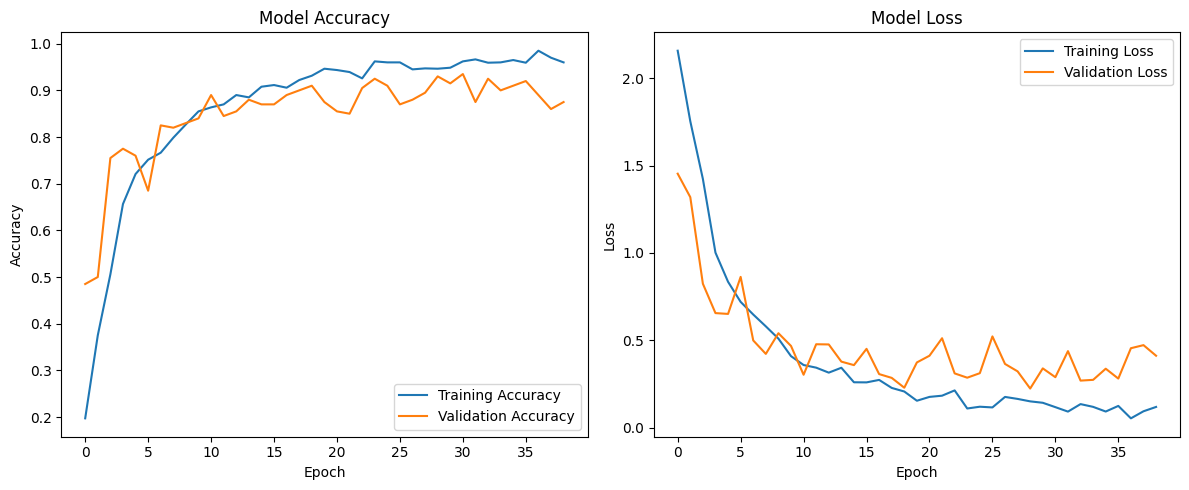

In [ ]:
import matplotlib.pyplot as plt

# Training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
